In [1]:
#import library
import pandas as pd
import numpy as np
import math
import utils
import statsmodels.api as sm

In [2]:
df_data_set = pd.read_csv('Data/shcmp multi variable for HAR.csv')
df_data_set['Date'] = pd.to_datetime(df_data_set['Date'])
df_data_set.set_index('Date', inplace=True)
df_data_set.head(5)

,Realized Volatility,Constant,RV_lag1,5MA_RV,22MA_RV,Abs_Bias_lag1,Abs_pct_chg_lag1,abs_overnight_info_lag1,Abs_Bias_lag2,Abs_pct_chg_lag2,abs_overnight_info_lag2,Abs_Bias_lag3,squared_pct_chg_lag3,abs_overnight_info_lag3
Date,,,,,,,,,,,,,,
2005-02-03,3.711811,1,3.041918,1.114210,0.943433,0.030942,5.3467,0.001048,0.019455,0.2427,0.000480,0.027719,1.8003,0.001950
2005-02-04,1.455927,1,3.711811,1.766252,1.082825,0.020110,0.8138,0.002981,0.030942,5.3467,0.001048,0.019455,0.2427,0.000480
2005-02-16,1.203328,1,1.455927,1.968796,1.090226,0.032456,2.1490,0.005510,0.020110,0.8138,0.002981,0.030942,5.3467,0.001048
2005-02-17,0.737522,1,1.203328,2.064023,1.122296,0.026108,0.7782,0.000897,0.032456,2.1490,0.005510,0.020110,0.8138,0.002981
2005-02-18,0.478975,1,0.737522,2.030101,1.104006,0.009802,0.2147,0.000368,0.026108,0.7782,0.000897,0.032456,2.1490,0.005510


In [3]:
X = df_data_set.drop('Realized Volatility',1)
Y = df_data_set['Realized Volatility']

Implementing HAR-RV model # by Corsi (2009)

The HAR-RV model is a regression-based model that uses lagged realized volatility
  as predictor variables to forecast the volatility of a financial asset. 
 The model assumes that the volatility of an asset depends on its own past volatility as 
 well as the past volatility of related assets and the overall market volatility. 

 RV_t = α_0 + α_1 RV_{t-1} + α_2 RV_{t-5} + α_3 RV_{t-22}  + ε_t



In [4]:
#Split the data into train set and test set
TEST_LEN = 439
Y_train, Y_test = Y[:-TEST_LEN], Y[-TEST_LEN:]
X_train, X_test = X[:-TEST_LEN], X[-TEST_LEN:]

In [5]:
X.shape, X_train.shape, Y_test.shape

((4388, 13), (3949, 13), (439,))

In [6]:
# Start Linear regression
mod = sm.OLS(Y_train,X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Realized Volatility   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.570
Method:                  Least Squares   F-statistic:                     437.2
Date:                 Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                         21:31:39   Log-Likelihood:                -7915.3
No. Observations:                 3949   AIC:                         1.586e+04
Df Residuals:                     3936   BIC:                         1.594e+04
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Constant                   -0.4156      0.053     -7.835      0.000      -0.520      -0.312
RV_lag1                     0.2532      0.019     13.477      0.000       0.216       0.290
5MA_RV                      0.2644      0.030      8.775      0.000       0.205       0.323
22MA_RV                     0.1592      0.027      5.926      0.000       0.107       0.212
Abs_Bias_lag1              40.9326      3.872     10.573      0.000      33.342      48.523
Abs_pct_chg_lag1            0.2947      0.037      7.975      0.000       0.222       0.367
abs_overnight_info_lag1    37.4209      5.294      7.069      0.000      27.042      47.800
Abs_Bias_lag2              -5.5742      4.277     -1.303      0.193     -13.959       2.811
Abs_pct_chg_lag2            0.0078      0.037      0.211      0.833      -0.065       0.080
abs_overnight_info_lag2    -6.3169      5.556     -1.137      0.256     -17.210       4.576
Abs_Bias_lag3               5.7737      3.625      1.593      0.111      -1.334      12.881
squared_pct_chg_lag3        0.0199      0.034      0.587      0.557      -0.046       0.086
abs_overnight_info_lag3   -10.4872      5.536     -1.894      0.058     -21.341       0.366
==============================================================================
Omnibus:                     4123.898   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           435196.643
Skew:                           5.005   Prob(JB):                         0.00
Kurtosis:                      53.445   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y_pred = res.predict(X_test)

In [8]:
utils.Predictions_Error(Predictions_val=y_pred,Actual_val=Y_test)

MAE =  0.37763691099706365
MSE =  0.3140922533733067
RMSE =  0.5604393396018045
R_2 =  0.1539407037888192
RMSPE =  1.1565763525899613
MSLE =  0.08201679911630941


MAE =  0.30221074598776043
MSE =  0.2546077265064707
RMSE =  0.5045866887923924
R_2 =  0.3123796859147281
RMSPE =  0.9269844040011631
MSLE =  0.04782273607008992

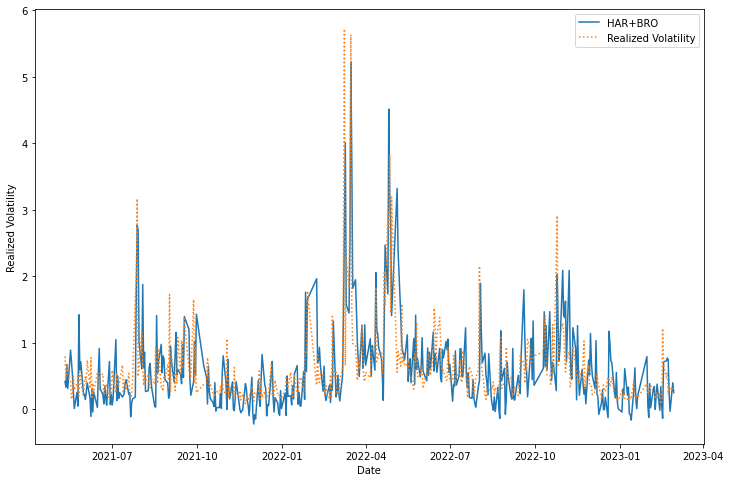

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(y_pred, label='HAR+BRO')
plt.plot(Y_test, label='Realized Volatility',linestyle=':')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.show()

In [12]:
train_pred = res.predict(X_train)

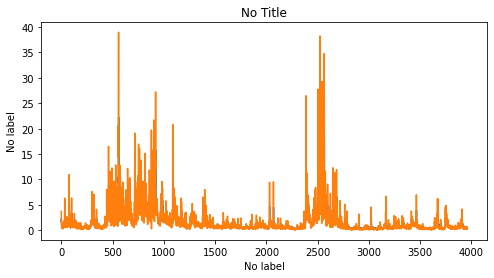

In [13]:
utils.plot_figure(data=train_pred,data2=Y_train)

In [14]:
utils.Predictions_Error(Predictions_val=train_pred,Actual_val=Y_train)

MAE =  0.7979512346517873
MSE =  3.6884765848300236
RMSE =  1.9205407011646547
R_2 =  0.5088291924540984
RMSPE =  1.0077596480828324
MSLE =  0.09895415886722511
